# Initiate utilities

In [1]:
import json

import matplotlib.pyplot as plt
import numpy as np

# Define constants

In [2]:
# EXPE_TIMESTAMP = "2001-01-01T00:00:00"
# EXPE_TIMESTAMP = "2023-03-03T14:45:28"
EXPE_TIMESTAMP = "2023-04-05T12:00:48"

RESULTS_FOLDER_PATH = f"../expe/results"
LATENCIES_DATA_PATH = f"{RESULTS_FOLDER_PATH}/latencies_data-{EXPE_TIMESTAMP}.json"
LATENCIES_PLOT_PATH = f"{RESULTS_FOLDER_PATH}/latencies_plot-{EXPE_TIMESTAMP}.pdf"

# Fetch experiment data

In [3]:
with open(LATENCIES_DATA_PATH, "r") as f:
    latency_data = json.load(f)

# Process experiment data

In [4]:
global_latencies = []

for latencies in latency_data["execLatencies"].values():
    for latency in latencies:
        # find the index for inserting the latency
        idx = 0
        for inserted_latency in global_latencies:
            if inserted_latency >= latency:
                break
            idx += 1
        # insert the latency in the correct position
        global_latencies.insert(idx, latency)

# Plot experiment data

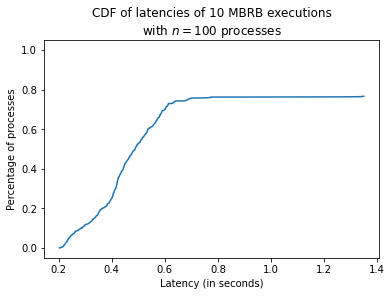

In [5]:
n_proc = latency_data["n"]
n_exec = len(latency_data["execLatencies"])
n_latencies_max = n_proc * n_exec
step = 1 / n_latencies_max
proc_percent = []
last_value = 0
for i in range(len(global_latencies)):
    proc_percent.append(last_value)
    last_value += step

title = f"CDF of latencies of {n_exec} MBRB executions\nwith $n={n_proc}$ processes"
    
plt.gca().set_ylim([-.05, 1.05])
plt.title(title)
plt.xlabel("Latency (in seconds)")
plt.ylabel("Percentage of processes")
plt.plot(global_latencies, proc_percent)
plt.savefig(LATENCIES_PLOT_PATH)
plt.show()